                 *** TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS ***

In [5]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob


In [2]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

1. Data Exploration and Preprocessing

In [21]:
df = pd.read_csv("C:\\Ankit_Singh\\Data Science\\Sample Data\\blogs.csv")
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [22]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [23]:
print("\nChecking for nulls")
print(df.isnull().sum())


Checking for nulls
Data      0
Labels    0
dtype: int64


In [26]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)


In [27]:
# Apply text cleaning
df['cleaned_data'] = df['Data'].apply(clean_text)


In [30]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer()
X_features = tfidf.fit_transform(df['cleaned_data'])
y_labels = df['Labels']



2. Naive Bayes Model for Text Classification

In [31]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)


In [32]:
# Initializing and training Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [33]:
# Now let's try to make prediction
y_pred = nb_classifier.predict(X_test)


3. Sentiment Analysis

In [34]:
# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [35]:
df['Sentiment'] = df['Data'].apply(get_sentiment)


In [36]:
# Sentiment distribution across all posts
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())



Sentiment Distribution:
Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


In [37]:
# Sentiment distribution across different categories
sentiment_category = pd.crosstab(df['Labels'], df['Sentiment'])
print("\nSentiment distribution per Category:")
print(sentiment_category)



Sentiment distribution per Category:
Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.mis

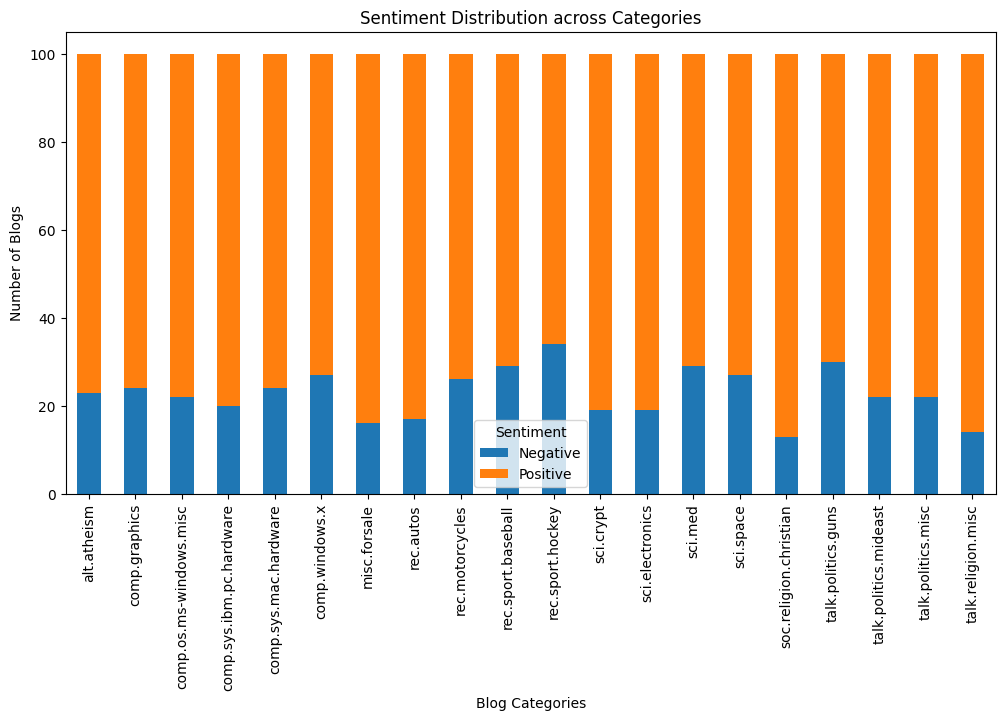

In [38]:
# Visualizing Sentiment distribution
sentiment_category.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sentiment Distribution across Categories')
plt.xlabel('Blog Categories')
plt.ylabel('Number of Blogs')
plt.legend(title='Sentiment')
plt.show()


4. Evaluation

In [39]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Naive Bayes Classifier: {:.2f}%".format(accuracy * 100))



Accuracy of the Naive Bayes Classifier: 85.00%


In [40]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.79      0.90      0.84        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.93      0.88      0.90        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.70      0.88      0.78        16
                 sci.med       0.88      0.88      

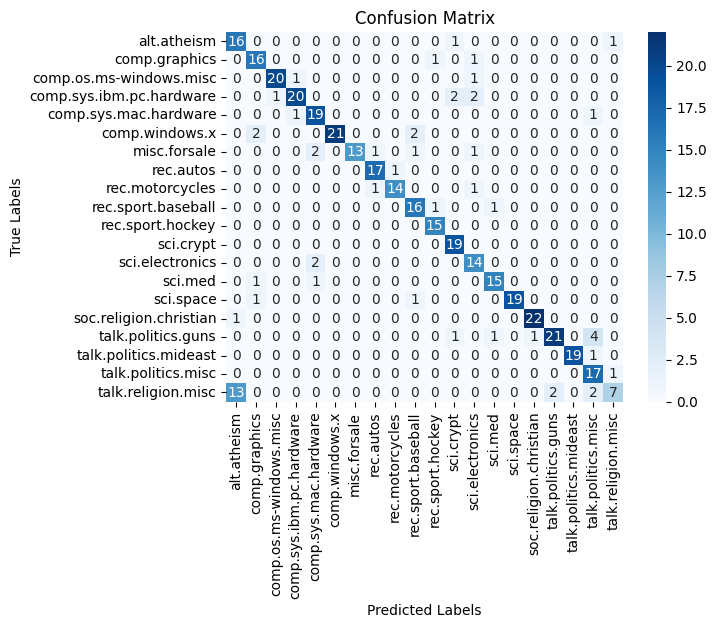

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_labels), yticklabels=np.unique(y_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Conclusion:   In this assignment, I successfully built a Naive Bayes text classification model to categorize blog posts across various topics with an impressive accuracy of 85%. Through thorough data cleaning, feature extraction, and model training, we demonstrated the effectiveness of Naive Bayes for natural language processing tasks.

Additionally, the sentiment analysis revealed that the majority of the blogs conveyed a positive tone, with consistent trends across different categories. Although some challenges were observed in accurately classifying diverse topics like "talk.religion.misc," the overall performance was strong and insightful.

This project highlights the importance of careful text preprocessing and the value of basic machine learning models in NLP. 
